In [1]:
import numpy as np
import pandas as pd
from patsy import ContrastMatrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/adult.data')
cols = ['workclass', 'sex', 'age', 'education_num', 'capital_gain',
        'capital_loss', 'hours_per_week', 'label']
data = data[cols]
data['label_code'] = pd.Categorical(data.label).codes

In [3]:
# 计算sex, label交叉报表
cross1 = pd.crosstab(data['sex'], data['label'])
cross1

label,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


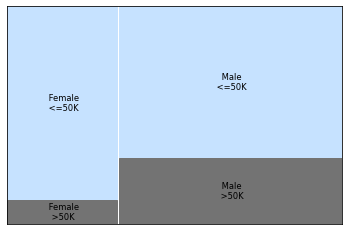

In [4]:
# 将交叉报表图形化
props = lambda key: {'color': '0.45'} if ' >50K' in key else {'color': '#C6E2FF'}
mosaic(cross1[[' >50K', ' <=50K']].stack(), properties=props, axes_label=False)
plt.show()

In [5]:
# 将数据分为训练集和测试集
train_set, test_set = train_test_split(data, test_size=0.2, random_state=2310)

In [6]:
# 加入sex，搭建逻辑回归模型，并训练模型
formula = 'label_code ~ C(sex) + education_num + capital_gain + capital_loss + hours_per_week'
model = sm.Logit.from_formula(formula, data=train_set)
re = model.fit()
print(re.summary())

Optimization terminated successfully.
         Current function value: 0.409236
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             label_code   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26042
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.2582
Time:                        20:42:17   Log-Likelihood:                -10660.
converged:                       True   LL-Null:                       -14370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.1944      0.112    -64.011      0.000      -7.415      -6.974
C(sex)[T. Male

In [7]:
# 加入workclass，搭建逻辑回归模型，并训练模型
formula = 'label_code ~ C(workclass) + education_num + capital_gain + capital_loss + hours_per_week'
model = sm.Logit.from_formula(formula, data=train_set)
re = model.fit()
print(re.summary())

         Current function value: 0.422077
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             label_code   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26035
Method:                           MLE   Df Model:                           12
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.2349
Time:                        20:42:17   Log-Likelihood:                -10994.
converged:                      False   LL-Null:                       -14370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -6.8672      0.138    -49.714      0.000      -7.138      -6.

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
# 剔除掉不显著的workclass，搭建逻辑回归模型，并训练模型
# 定义workclass的类别顺序，数组里的前3个类别为基准类别
l = [' ?', ' Never-worked', ' Without-pay', ' State-gov',
     ' Self-emp-not-inc', ' Private', ' Federal-gov',
     ' Local-gov',  ' Self-emp-inc']
# 定义各个类别对应的虚拟变量
contrast = np.eye(9, 6, k=-3)
# 为每个虚拟变量命名
contrast_mat = ContrastMatrix(contrast, l[3:])
formula = '''label_code ~ C(workclass, contrast_mat, levels=l)
    + C(sex) + education_num + capital_gain
    + capital_loss + hours_per_week'''
model = sm.Logit.from_formula(formula, data=train_set)
re = model.fit()
print(re.summary())

Optimization terminated successfully.
         Current function value: 0.405935
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             label_code   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26036
Method:                           MLE   Df Model:                           11
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.2642
Time:                        20:42:18   Log-Likelihood:                -10574.
converged:                       True   LL-Null:                       -14370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept             

In [9]:
# 使用sex变量的Ridit scoring搭建逻辑回归模型，并训练模型
l = [' Male', ' Female']
contrast = [[-0.33], [0.67]]
contrast_mat = ContrastMatrix(contrast, ['Ridit(sex)'])
formula = '''label_code ~ C(sex, contrast_mat, levels=l) + education_num
          + capital_gain + capital_loss + hours_per_week'''
model = sm.Logit.from_formula(formula, data=train_set)
re = model.fit()
print(re.summary())

Optimization terminated successfully.
         Current function value: 0.409236
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             label_code   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26042
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.2582
Time:                        20:42:18   Log-Likelihood:                -10660.
converged:                       True   LL-Null:                       -14370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -6.3